<a href="https://colab.research.google.com/github/SLVmain/NLP/blob/Les_05/HW_05_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 5. Тема “POS-tagger и NER”

###Задание 1. Написать теггер на данных с русским языком
- проверить UnigramTagger, BigramTagger, TrigramTagger и их комбинации

- написать свой теггер как на занятии, попробовать разные векторайзеры, добавить знание не только букв но и слов

- сравнить все реализованные методы сделать выводы
 
###Задание 2. Проверить насколько хорошо работает NER
данные брать из http://www.labinform.ru/pub/named_entities/
- проверить NER из nltk/spacy/deeppavlov
- написать свой нер попробовать разные подходы
-- передаём в сетку токен и его соседей
-- передаём в сетку только токен
- сделать выводы по вашим экспериментам какой из подходов успешнее справляется


In [ ]:
!wget https://github.com/ods-ai-ml4sg/proj_news_viz/releases/download/data/interfax.csv.gz

In [ ]:
!ls

drive  interfax.csv.gz	sample_data


In [ ]:
from corus import load_ods_interfax

path = 'interfax.csv.gz'
records = load_ods_interfax(path)
next(records)

NewsRecord(
    timestamp=datetime.datetime(2019, 4, 30, 13, 26),
    url='https://www.sport-interfax.ru/659837',
    edition='www.sport-interfax.ru',
    topics='Спорт',
    authors=None,
    title='Российского чемпиона мира по греко-римской борьбе отстранили за допинг',
    text='Москва. 30 апреля. INTERFAX.RU - Чемпион мира по греко-римской борьбе 2014 года Чингиз Лабазанов наказан дисквалификацией сроком на один год за нарушение антидопинговых правил, сообщает во вторник пресс-служба Российского антидопингового агентства во вторник.n"Федерация борьбы России, по решению РАА РУСАДА, вынесла решение, по которому спортсмен Лабазанов Чингиз лишен права на 1 год за нарушение ст. 2.4 Всероссийских антидопинговых правил, период, начинающийся 11 апреля 2019 года", - говорится в сообщении.nКроме этого, на четыре года за нарушение антидопинговых правил отстранен еще один отечественный борец - Валерий Гусаров. Его наказание начинается с 31 июля 2018 года.',
    stats=Stats(
        fb=None,
  

In [ ]:
data = []
for record in records:
    data.append(record.text)

In [ ]:
len(data)

543959

In [ ]:
data[2]

'Москва. 14 мая. INTERFAX.RU - Российский скейтбордист Максим Круглов дисквалифицирован на четыре года за нарушение антидопинговых правил, сообщает пресс-служба Российского антидопингового агентства (РУСАДА) во вторник.n"Федерация скейтбординга России на основании и во исполнение решения РАА "РУСАДА" приняла решение дисквалифицировать спортсмена Круглова Максима на четыре года за нарушение п. 2.3 Общероссийских антидопинговых правил (отказ или неявка на процедуру сдачи проб - ИФ)", - говорится в сообщении.nСрок наказания Круглова начинается с 7 февраля 2019 года.nРоссиянин входит в топ-20 элитных скейтбордистов мира и являлся кандидатом на поездку на Олимпиаду 2020 года в Токио.'

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib
%matplotlib inline
from tqdm.notebook import tqdm

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
nltk.download('punkt')

In [ ]:
data_tok = [nltk.word_tokenize(x) for x in tqdm(data[:100000])] # уменьшим датасет, чтобы побыстрее считался

  0%|          | 0/100000 [00:00<?, ?it/s]

In [ ]:
import pickle
path = '/content/drive/MyDrive/data/'

with open(path + "data_tok.pkl", 'wb') as f:
  pickle.dump(data_tok, f)

In [ ]:
import pickle
path = '/content/drive/MyDrive/data/'
with open(path + "data_tok.pkl", 'rb') as f:
     data_tok = pickle.load(f)

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
data_tag = [nltk.pos_tag(x) for x in tqdm(data_tok)]

  0%|          | 0/100000 [00:00<?, ?it/s]

In [ ]:
data_tag[0][:10]

[('Москва', 'NN'),
 ('.', '.'),
 ('8', 'CD'),
 ('мая', 'NN'),
 ('.', '.'),
 ('INTERFAX.RU', 'NNP'),
 ('-', ':'),
 ('Главный', 'NN'),
 ('тренер', 'JJ'),
 ('петербургского', 'NNP')]

In [ ]:
with open(path + "data_tag.pkl", 'wb') as f:
  pickle.dump(data_tag, f)

In [ ]:
import pickle
path = '/content/drive/MyDrive/data/'
with open(path + "data_tag.pkl", 'rb') as f:
     data_tag = pickle.load(f)

In [ ]:
len(data_tag)

100000

In [ ]:
from nltk.tag import DefaultTagger
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger, TrigramTagger
from nltk.tag import RegexpTagger
import numpy as np
import pandas as pd

In [ ]:
train_data = data_tag[:int(len(data_tag) * 0.8)]
test_data =  data_tag[int(len(data_tag) * 0.8):]                          

In [ ]:
def backoff_tagger(train_sents, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sents, backoff=backoff)
    return backoff

In [ ]:
default_tagger = nltk.DefaultTagger('NN')
unigram_tagger = UnigramTagger(train_data)
bigram_tagger = BigramTagger(train_data, backoff=unigram_tagger)
trigram_tagger = TrigramTagger(train_data, backoff=bigram_tagger)

backoff = DefaultTagger('NN') 
mix_tagger = backoff_tagger(train_data,  
                     [UnigramTagger, BigramTagger, TrigramTagger],  
                     backoff = backoff)  

In [ ]:
models = [('default', default_tagger),
          ('unigram', unigram_tagger),
          ('bigram', bigram_tagger),
           ('trigram', trigram_tagger),
           ('mix', mix_tagger)]

In [ ]:
stats = []

for name, model in models:
    accuracy = model.evaluate(test_data)
    stats.append((name, accuracy))
  
all_tagger = pd.DataFrame(stats, columns = ['model','accuracy'])
all_tagger.sort_values('accuracy', ascending=False)

,model,accuracy
3,trigram,0.914881
4,mix,0.911826
2,bigram,0.905554
1,unigram,0.865672
0,default,0.066560


лучше отработали триграммы и микс из таггеров, чуть хуже биграммы и униграммы

In [ ]:
'''A list of positive and negative opinion words or sentiment words for English.

>>> from nltk.corpus import opinion_lexicon
>>> opinion_lexicon.words()[:4]
    ['2-faced', '2-faces', 'abnormal', 'abolish']'''
    #https://www.nltk.org/howto/corpus.html

In [ ]:
nltk.download('opinion_lexicon')

In [ ]:
sorted(opinion_lexicon.words())[-10:]

['zapped',
 'zaps',
 'zeal',
 'zealot',
 'zealous',
 'zealously',
 'zenith',
 'zest',
 'zippy',
 'zombie']

In [ ]:
# напишем свой теггер для слов, обозначающих мнение
from nltk.tag import SequentialBackoffTagger
from nltk.corpus import opinion_lexicon

class OLEXTagger(SequentialBackoffTagger):
    def __init__(self, *args, **kwargs):
        SequentialBackoffTagger.__init__(self, *args, **kwargs)
        self.op_lex_set = set([n.lower() for n in opinion_lexicon.words()])
            
    def choose_tag(self, tokens, index, history):
        word = tokens[index]
        if word.lower() in self.op_lex_set:
             return 'OLEX'
        else:
             return None
            
olt = OLEXTagger()
print(olt.tag(['abnormal'])) 
print(olt.tag(['abomination']))  
print(olt.tag(['zest'])) 

[('abnormal', 'OLEX')]
[('abomination', 'OLEX')]
[('zest', 'OLEX')]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [ ]:
# уменьшим размер выборки, так как очень долго считает (было 100 000)

data_tag_small = data_tag[:1000]
train_data = data_tag_small[:int(len(data_tag_small) * 0.8)]
test_data =  data_tag_small[int(len(data_tag_small) * 0.8):]

In [ ]:
train_tok = []
train_label = []
for sent in train_data:
    for tok in sent:
        train_tok.append(tok[0])
        train_label.append('NO_TAG' if tok[1] is None else tok[1])
        
test_tok = []
test_label = []
for sent in test_data:
    for tok in sent:
        test_tok.append(tok[0])
        test_label.append('NO_TAG' if tok[1] is None else tok[1])

In [ ]:
# решение проблемы, если в трейн и тест разные классы
le = LabelEncoder()
le.fit(train_label)
test_label1 = list(map(lambda s: '<unknown>' if s not in le.classes_ else s, test_label))

In [ ]:
set_a = set(test_label)
set_b = set(test_label1)
set_a.difference(set_b)

set()

In [ ]:
print(le.classes_)

['#' '$' "''" '(' ')' ',' '.' ':' 'CC' 'CD' 'DT' 'FW' 'IN' 'JJ' 'JJR' 'NN'
 'NNP' 'NNPS' 'NNS' 'POS' 'PRP' 'RB' 'SYM' 'UH' 'VB' 'VBD' 'VBG' 'VBP'
 'VBZ' '``']


In [ ]:
'''import bisect
le_classes = le.classes_.copy()
bisect.insort_left(le_classes, '<unknown>')
le.classes_ = le_classes.copy()

train_enc_labels = le.transform(train_label)
test_enc_labels = le.transform(test_label1)'''

"import bisect\nle_classes = le.classes_.copy()\nbisect.insort_left(le_classes, '<unknown>')\nle.classes_ = le_classes.copy()\n\ntrain_enc_labels = le.transform(train_label)\ntest_enc_labels = le.transform(test_label1)"

In [ ]:
train_enc_labels = le.transform(train_label)
test_enc_labels = le.transform(test_label)

In [ ]:
train_tok[:5], train_label[:5]

(['Москва', '.', '8', 'мая', '.'], ['NN', '.', 'CD', 'NN', '.'])

In [ ]:
hvectorizer = HashingVectorizer(ngram_range=(1, 3),  analyzer='word', n_features=50)

In [ ]:
X_train = hvectorizer.fit_transform(train_tok)

In [ ]:
X_test = hvectorizer.transform(test_tok)

In [ ]:
X_train.shape

(198951, 50)

In [ ]:
lr = LogisticRegression(random_state=0) #, max_iter=10)
lr.fit(X_train, train_enc_labels)

LogisticRegression(random_state=0)

In [ ]:
pred = lr.predict(X_test)

In [ ]:
accuracy_score(test_enc_labels, pred)

0.647492561769652

In [ ]:
# переберем в цикле различные параметры векторайзеров

In [ ]:
models = [('CountVectorizer_word', CountVectorizer(ngram_range=(1,3),analyzer='word', max_features=50)),
          ('TfidfVectorizer_word', TfidfVectorizer(ngram_range=(1,3),analyzer='word', max_features=50)),
          ('HashingVectorizer_word', HashingVectorizer(ngram_range=(1, 3), analyzer='word', n_features=50)),
          ('CountVectorizer_char', CountVectorizer(ngram_range=(1,3), analyzer='char', max_features=50)),
          ('TfidfVectorizer_char', TfidfVectorizer(ngram_range=(1,3), analyzer='char', max_features=50)),
          ('HashingVectorizer_char', HashingVectorizer(ngram_range=(1, 3), analyzer='char', n_features=50)),
          ('CountVectorizer_char_wb', CountVectorizer(ngram_range=(1,3), analyzer='char_wb', max_features=50)),
          ('TfidfVectorizer_char_wb', TfidfVectorizer(ngram_range=(1,3), analyzer='char_wb', max_features=50)),
          ('HashingVectorizer_char_wb', HashingVectorizer(ngram_range=(1, 3), analyzer='char_wb', n_features=50))
          ]

In [ ]:
stats = []
classifier = LogisticRegression()

for name, model in tqdm(models):
    X_train = model.fit_transform(train_tok)
    X_test = model.transform(test_tok)
    
    classifier.fit(X_train, train_enc_labels)
    predictions = classifier.predict(X_test)
    
    accuracy = accuracy_score(test_enc_labels, predictions)

    stats.append((name, accuracy))
    
all_vectorizer = pd.DataFrame(stats, columns = ['model','accuracy'])
all_vectorizer.sort_values('accuracy', ascending=False)

  0%|          | 0/9 [00:00<?, ?it/s]

,model,accuracy
5,HashingVectorizer_char,0.851580
8,HashingVectorizer_char_wb,0.850265
4,TfidfVectorizer_char,0.788905
3,CountVectorizer_char,0.788819
7,TfidfVectorizer_char_wb,0.787331
6,CountVectorizer_char_wb,0.787180
0,CountVectorizer_word,0.659329
1,TfidfVectorizer_word,0.659200
2,HashingVectorizer_word,0.647493


лучшую точность на линейной регрессии показал HashingVectorizer на char и char_wb

###Задание 2. Проверить насколько хорошо работает NER
данные брать из http://www.labinform.ru/pub/named_entities/
- проверить NER из nltk/spacy/deeppavlov
- написать свой нер попробовать разные подходы
-- передаём в сетку токен и его соседей
-- передаём в сетку только токен
- сделать выводы по вашим экспериментам какой из подходов успешнее справляется

In [ ]:
!wget http://www.labinform.ru/pub/named_entities/collection5.zip

In [ ]:
!unzip collection5.zip

In [ ]:
!pip install corus

In [ ]:
import corus

In [ ]:
from corus import load_ne5

dir = 'Collection5/'
records = load_ne5(dir)
rec = next(records)

In [ ]:
rec.text

'Политологи прокомментировали отставку самарского губернатора Артякова\r\n10/05/201212:31\r\n\r\nМОСКВА, 10 мая - РИА Новости. Первая при президенте Владимире Путине отставка губернатора - Самарской области Владимира Артякова - является продолжением кадровой политики Дмитрия Медведева и связана с желанием минимизировать риски на выборах глав регионов, считают эксперты. При этом "переезд" Николая Меркушкина из Мордовии в Самарскую область политологи связывают с желанием власти использовать его опыт управления в более проблемном субъекте.\r\n\r\nРуководитель Мордовии единоросс Николай Меркушкин, занимавший этот пост почти 17 лет, отправлен в качестве врио губернатора в Самарскую область. Экс-президент "АвтоВАЗа" единоросс Владимир Артяков, работавший самарским губернатором около пяти лет, покинул пост по собственному желанию и досрочно, поскольку срок его полномочий истекал в августе 2012 года.\r\n\r\nПолномочия же Меркушкина, одного из "старожилов" губернаторского корпуса, и вовсе истек

In [ ]:
rec.spans

[Ne5Span(
     index='T1',
     type='PER',
     start=61,
     stop=69,
     text='Артякова'
 ), Ne5Span(
     index='T2',
     type='GEOPOLIT',
     start=90,
     stop=96,
     text='МОСКВА'
 ), Ne5Span(
     index='T3',
     type='MEDIA',
     start=107,
     stop=118,
     text='РИА Новости'
 ), Ne5Span(
     index='T4',
     type='PER',
     start=142,
     stop=158,
     text='Владимире Путине'
 ), Ne5Span(
     index='T5',
     type='LOC',
     start=182,
     stop=199,
     text='Самарской области'
 ), Ne5Span(
     index='T6',
     type='PER',
     start=200,
     stop=218,
     text='Владимира Артякова'
 ), Ne5Span(
     index='T7',
     type='PER',
     start=261,
     stop=278,
     text='Дмитрия Медведева'
 ), Ne5Span(
     index='T8',
     type='PER',
     start=384,
     stop=402,
     text='Николая Меркушкина'
 ), Ne5Span(
     index='T9',
     type='LOC',
     start=406,
     stop=414,
     text='Мордовии'
 ), Ne5Span(
     index='T10',
     type='LOC',
     start=417

In [ ]:
words_docs = []
for ix, rec in enumerate(records):
    words = []
    for token in tokenize(rec.text):
        type_ent = 'OUT'
        for ent in rec.spans:
            if (token.start >= ent.start) and (token.stop <= ent.stop):
                type_ent = ent.type
                break
        words.append([token.text, type_ent])
    words_docs.extend(words)

In [ ]:
articals = []
for rec in records:
    articals.append(rec.text)

In [ ]:
doc1 = articals[1]
doc1

'Президент: кризиса в Турции из-за отставки армейского командования нет\r\n\r\nПрезидент Турции Абдуллах Гюль в субботу заявил, что в стране нет кризиса в связи с отставками начальника Генштаба и командования вооруженных сил.\r\n\r\n"Произошли чрезвычайные события, но кризиса нет", - сказал турецкий лидер, отвечая на вопросы журналистов в Анкаре.\r\n\r\nВ минувшую пятницу начальник турецкого Генштаба Ышик Кошанер, а также главкомы сухопутных сил, ВВС и ВМС подали в отставку в знак протеста против нахождения под стражей большой группы действующих генералов и офицеров турецкой армии по обвинению в подготовке переворота с целью свержения правительства нынешнего премьера Тайипа Эрдогана.\r\n\r\n"В настоящее время под арестом без наличия на то судебных вердиктов находятся 250 военных, в том числе 173 действующих, среди которых генералы, адмиралы, офицеры и унтерофицеры. Их нахождение под стражей идет вразрез с всеобщими правовыми нормами и не вписывается в рамки законов и правосудия", - нап

In [ ]:
import pandas as pd

In [ ]:
df_words = pd.DataFrame(words_docs, columns=['word', 'tag'])

In [ ]:
df_words['tag'].value_counts()

OUT         218470
PER          21155
ORG          13650
LOC           4530
GEOPOLIT      4353
MEDIA         2476
Name: tag, dtype: int64

In [ ]:
df_words.head()

,word,tag
0,Мать,OUT
1,Майкла,PER
2,Джексона,PER
3,рассказала,OUT
4,",",OUT


In [ ]:
df_words.shape

(264634, 2)

In [ ]:
# Для разметки NER с помощью NLTK сначала производим токенизацию слов, затем POS тэггинг. 

In [ ]:
import nltk
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('names')

In [ ]:
nltk.download('punkt')

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
import tqdm
words5 = list(df_words.word)

In [ ]:
#data5_tok = [nltk.word_tokenize(x) for x in words5]
#data5_tag = [nltk.pos_tag(x) for x in data5_tok[:50000]]

In [ ]:
data5_tag = nltk.pos_tag(words5[:50000])

In [ ]:
data5_tag[:10]

[('Мать', 'JJ'),
 ('Майкла', 'NNP'),
 ('Джексона', 'NNP'),
 ('рассказала', 'NNP'),
 (',', ','),
 ('как', 'NNP'),
 ('она', 'NNP'),
 ('«', 'NNP'),
 ('исчезла', 'NNP'),
 ('»', 'NNP')]

С помощью функции nltk.ne_chunk () (уже оттренированный классификатор) мы можем распознавать именованные сущности с помощью классификатора, который добавляет метки категорий, такие как PERSON, ORGANIZATION и GPE.

In [ ]:
{(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(words5[:50000])) if hasattr(chunk, 'label') }

In [ ]:
# возьмем одну небольшую статью и посмотрим разные NER
test_doc = articals[0]

In [ ]:
{(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(test_doc))) if hasattr(chunk, 'label') }

{('Блэнкет', 'PERSON'),
 ('Джексон', 'PERSON'),
 ('Документы', 'PERSON'),
 ('Жермен Джексон', 'PERSON'),
 ('Кэтрин', 'PERSON'),
 ('Кэтрин Джексон', 'PERSON'),
 ('Кэтрин Жермен Джексон', 'PERSON'),
 ('Майкла Джексона', 'ORGANIZATION'),
 ('Майкла Джексона', 'PERSON'),
 ('Майкла Джексона Кэтрин', 'PERSON'),
 ('Мать', 'PERSON'),
 ('Накануне', 'PERSON'),
 ('Новости', 'PERSON'),
 ('Принс', 'PERSON'),
 ('Пэрис', 'PERSON'),
 ('Ранее', 'PERSON'),
 ('ТиДжей', 'ORGANIZATION'),
 ('Тито Джексона', 'PERSON'),
 ('Тусоне', 'GPE')}

#Spacy

In [ ]:
!pip -q install spacy
!python -m spacy download en
!python -m spacy download en_core_web_sm

In [ ]:
!pip install -U spacy
!python -m spacy info

In [ ]:
import spacy
from spacy import displacy
from spacy.lang.ru import Russian

#nlp = Russian()
#ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
#article = nlp(rec.text)


In [ ]:
!python -m spacy download ru_core_news_md

In [ ]:
import ru_core_news_md
nlp = ru_core_news_md.load()

In [ ]:
doc = nlp(test_doc)
for ent in doc.ents:
    print(ent.text, ent.label_)

Майкла Джексона PER
Майкла Джексона Кэтрин PER
РИА Новости ORG
Ассошиэйтед Пресс PER
Документы PER
Кэтрин PER
Майкла Джексона PER
Кэтрин Джексон PER
Калифорни LOC
Жермен Джексон PER
Ребби PER
Аризона LOC
Калифорнии LOC
Кэтрин PER
Блэнкет LOC
Принс PER
Пэрис PER
ТиДжей (TJ) PER
Тито Джексона PER
Кэтрин PER
Майкла Джексона PER
Тусон LOC
Аризона LOC
США LOC
Кэтрин PER
Калифорнии LOC
Тусоне LOC
Кэтрин PER
Принс PER
Пэрис PER
Блэнкет PER
Кэтрин PER
Майкла Джексона PER
Кэтрин PER
СМИ ORG
Джексона PER
Ассошиэйтед Пресс PER
Кэтрин Жермен Джексон PER
Майкл Джексон PER


In [ ]:
for named_entity in doc.ents:
    if named_entity.label_ == "PER":
        print(named_entity)

Майкла Джексона
Майкла Джексона Кэтрин
Ассошиэйтед Пресс
Документы
Кэтрин
Майкла Джексона
Кэтрин Джексон
Жермен Джексон
Ребби
Кэтрин
Принс
Пэрис
ТиДжей (TJ)
Тито Джексона
Кэтрин
Майкла Джексона
Кэтрин
Кэтрин
Принс
Пэрис
Блэнкет
Кэтрин
Майкла Джексона
Кэтрин
Джексона
Ассошиэйтед Пресс
Кэтрин Жермен Джексон
Майкл Джексон


In [ ]:
displacy.render(doc, jupyter=True, style='ent')

# deeppavlov

In [ ]:
#!python -m venv env 
# #.\env\Scripts\activate.bat
#!pip install deeppavlov
#!python -m deeppavlov install squad_bert
#!python -m deeppavlov install ner_ontonotes

In [ ]:
'''import deeppavlov
from deeppavlov import configs, build_model
deeppavlov_ner = build_model(configs.ner, download=True)
rus_document = "Нью-Йорк, США, 30 апреля 2020, 01:01 — REGNUM В администрации президента США Дональда Трампа планируют пройти все этапы создания вакцины от коронавируса в ускоренном темпе и выпустить 100 млн доз до конца 2020 года, передаёт агентство Bloomberg со ссылкой на осведомлённые источники"
deeppavlov_ner([rus_document])'''

In [ ]:
!pip install deeppavlov

In [ ]:
!python -m deeppavlov install ner_rus_bert_torch

In [ ]:
from deeppavlov import configs, build_model

ner_model = build_model(configs.ner.ner_rus_bert_torch, download=True)

# [[['Bob', 'Ross', 'lived', 'in', 'Florida']], [['B-PERSON', 'I-PERSON', 'O', 'O', 'B-GPE']]]

In [ ]:
# в модели ограничение стоит на количество токенов 512, это неудобно, нужно резать данные на предложения
dpavlov_tags = ner_model([test_doc[:512]])
print(dpavlov_tags)

[[['Мать', 'Майкла', 'Джексона', 'рассказала', ',', 'как', 'она', '«', 'исчезла', '»', 'на', 'несколько', 'дней', '\r', '\n', '\r', '\n', 'Мать', 'скончавшегося', 'в', '2009', 'году', '"', 'короля', 'поп', '-', 'музыки', '"', 'Майкла', 'Джексона', 'Кэтрин', ',', 'которая', 'две', 'недели', 'назад', '"', 'пропала', '"', 'и', 'обнаружилась', 'лишь', 'через', 'десять', 'дней', ',', 'сообщила', ',', 'что', 'родственники', 'преднамеренно', 'лишили', 'ее', 'связи', 'с', 'внешним', 'миром', ',', 'передает', 'РИА', 'Новости', 'со', 'ссылкой', 'на', 'агентство', 'Ассошиэйтед', 'Пресс', ',', 'которое', 'приводит', 'данные', 'судебных', 'документов', '.', '\r', '\n', '\r', '\n', 'Документы', ',', 'в', 'которых', 'Кэтрин', 'рассказала', 'об', 'этом', ',', 'были', 'прикреплены', 'к', 'официальному', 'запросу', 'в', 'суд', 'о', 'восстанов']], [['O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 

In [ ]:
len(dpavlov_tags[1][0]), len(dpavlov_tags[0][0])

(96, 96)

In [ ]:
dpavlov_tags[0][0][95], dpavlov_tags[1][0][95]

('восстанов', 'O')

In [ ]:
for i in range(len(dpavlov_tags[0][0])):
  print(dpavlov_tags[0][0][i], dpavlov_tags[1][0][i])
  

Мать O
Майкла B-PER
Джексона I-PER
рассказала O
, O
как O
она O
« O
исчезла O
» O
на O
несколько O
дней O
 O

 O
 O

 O
Мать O
скончавшегося O
в O
2009 O
году O
" O
короля O
поп O
- O
музыки O
" O
Майкла B-PER
Джексона I-PER
Кэтрин B-PER
, O
которая O
две O
недели O
назад O
" O
пропала O
" O
и O
обнаружилась O
лишь O
через O
десять O
дней O
, O
сообщила O
, O
что O
родственники O
преднамеренно O
лишили O
ее O
связи O
с O
внешним O
миром O
, O
передает O
РИА B-ORG
Новости I-ORG
со O
ссылкой O
на O
агентство O
Ассошиэйтед B-ORG
Пресс I-ORG
, O
которое O
приводит O
данные O
судебных O
документов O
. O
 O

 O
 O

 O
Документы O
, O
в O
которых O
Кэтрин B-PER
рассказала O
об O
этом O
, O
были O
прикреплены O
к O
официальному O
запросу O
в O
суд O
о O
восстанов O


In [ ]:
ner_model(['Bob Ross lived in Florida'])

[[['Bob', 'Ross', 'lived', 'in', 'Florida']],
 [['B-PER', 'I-PER', 'O', 'O', 'B-LOC']]]

In [ ]:
ner_model(['Боб жил во Флориде'])

[[['Боб', 'жил', 'во', 'Флориде']], [['B-PER', 'O', 'O', 'B-LOC']]]

#Natasha

In [ ]:
!pip install natasha

In [ ]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

In [ ]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

#text = 'Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. «Я не могу понять, как прославление тех, кто непосредственно принимал участие в ужасных антисемитских преступлениях, помогает бороться с антисемитизмом и ксенофобией. Украина не должна забывать о преступлениях, совершенных против украинских евреев, и никоим образом не отмечать их через почитание их исполнителей», — написал дипломат. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года). В июле аналогичное решение принял Житомирский областной совет. В начале месяца с предложением к президенту страны Петру Порошенко вернуть Бандере звание Героя Украины обратились депутаты Верховной Рады. Парламентарии уверены, что признание Бандеры национальным героем поможет в борьбе с подрывной деятельностью против Украины в информационном поле, а также остановит «распространение мифов, созданных российской пропагандой». Степан Бандера (1909-1959) был одним из лидеров Организации украинских националистов, выступающей за создание независимого государства на территориях с украиноязычным населением. В 2010 году в период президентства Виктора Ющенко Бандера был посмертно признан Героем Украины, однако впоследствии это решение было отменено судом. '
doc = Doc(test_doc)

In [ ]:
doc.segment(segmenter)
display(doc.tokens[:5])
display(doc.sents[:5])

[DocToken(stop=4, text='Мать'),
 DocToken(start=5, stop=11, text='Майкла'),
 DocToken(start=12, stop=20, text='Джексона'),
 DocToken(start=21, stop=31, text='рассказала'),
 DocToken(start=31, stop=32, text=',')]

[DocSent(stop=403, text='Мать Майкла Джексона рассказала, как она «исчезла..., tokens=[...]),
 DocSent(start=407, stop=564, text='Документы, в которых Кэтрин рассказала об этом, б..., tokens=[...]),
 DocSent(start=568, stop=671, text='Ранее, 22 июля, представитель Кэтрин Джексон пода..., tokens=[...]),
 DocSent(start=672, stop=789, text='Однако вскоре брат "короля поп-музыки" Жермен Дже..., tokens=[...]),
 DocSent(start=790, stop=968, text='Именно поэтому женщина вместе со своей старшей до..., tokens=[...])]

In [ ]:
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)
sent = doc.sents[0]
sent.morph.print()

                Мать NOUN|Animacy=Anim|Case=Nom|Gender=Fem|Number=Sing
              Майкла PROPN|Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing
            Джексона PROPN|Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing
          рассказала VERB|Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act
                   , PUNCT
                 как SCONJ
                 она PRON|Case=Nom|Gender=Fem|Number=Sing|Person=3
                   « PUNCT
             исчезла VERB|Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act
                   » PUNCT
                  на ADP
           несколько NUM|Animacy=Inan|Case=Acc
                дней NOUN|Animacy=Inan|Case=Gen|Gender=Masc|Number=Plur
                Мать PROPN|Animacy=Anim|Case=Nom|Gender=Fem|Number=Sing
       скончавшегося VERB|Aspect=Perf|Case=Gen|Gender=Masc|Number=Sing|Tense=Past|VerbForm=Part|Voice=Act
                   в ADP
                2009 ADJ
                году NOUN|An

In [ ]:
sent.syntax.print()

                      ┌──► Мать          nsubj
                      │ ┌─ Майкла        
                      │ └► Джексона      flat:name
                      └─── рассказала    
    ┌────────────────────► ,             punct
    │                 ┌──► как           advmod
┌──►│                 │    она           nsubj
│   │                 │ ┌► «             punct
│ ┌►│     ┌───┌─┌───┌─└─└─ исчезла       ccomp
│ │ │     │   │ │   │ └──► »             punct
│ │ │     │   │ │   │ ┌──► на            case
│ │ │     │   │ │   │ │ ┌► несколько     nummod:gov
│ │ │     │   │ │   └►└─└─ дней          obl
│ │ │     │ ┌►│ │          Мать          nsubj
│ │ │     │ │ │ │ ┌►┌───── скончавшегося acl
│ │ │     │ │ │ │ │ │ ┌──► в             case
│ │ │     │ │ │ │ │ │ │ ┌► 2009          amod
│ │ │     │ │ │ │ │ └►└─└─ году          obl
│ │ │     │ │ │ │ │     ┌► "             punct
│ │ │ ┌──►│ │ │ │ └─┌─┌─└─ короля        obj
│ │ │ │   │ │ │ │ │ │ └──► поп-музыки    nmod
│ │ │ │   │ │ │ │ │ └────

Модуль извлечения именованных сущностей не зависит от результатов морфологического и синтаксического разбора, его можно использовать отдельно.

In [ ]:
doc.tag_ner(ner_tagger)
doc.ner.print()

Мать Майкла Джексона рассказала, как она «исчезла» на несколько дней
     PER────────────                                                
Мать скончавшегося в 2009 году "короля поп-музыки" Майкла Джексона 
                                                   PER──────────── 
Кэтрин, которая две недели назад "пропала" и обнаружилась лишь через 
PER───                                                               
десять дней, сообщила, что родственники преднамеренно лишили ее связи 
с внешним миром, передает РИА Новости со ссылкой на агентство 
                          ORG────────                         
Ассошиэйтед Пресс, которое приводит данные судебных документов.
ORG──────────────                                              
Документы, в которых Кэтрин рассказала об этом, были прикреплены к 
                     PER───                                        
официальному запросу в суд о восстановлении ее права на опеку троих 
детей Майкла Джексона.
      PER──────────── 
Ранее, 22 

##Spacy и Natasha отработали NER лучше nltk и dpavlov

- написать свой нер попробовать разные подходы
-- передаём в сетку токен и его соседей
-- передаём в сетку только токен
- сделать выводы по вашим экспериментам какой из подходов успешнее справляется

In [ ]:
!wget http://www.labinform.ru/pub/named_entities/collection5.zip

In [ ]:
!unzip collection5.zip

In [ ]:
!pip install corus

In [ ]:
import corus

In [ ]:
from corus import load_ne5

dir = 'Collection5/'
records = load_ne5(dir)
rec = next(records)

In [ ]:
!pip install razdel

In [ ]:
from razdel import tokenize

In [ ]:
words_docs = []
for ix, rec in enumerate(records):
    words = []
    for token in tokenize(rec.text):
        type_ent = 'OUT'
        for ent in rec.spans:
            if (token.start >= ent.start) and (token.stop <= ent.stop):
                type_ent = ent.type
                break
        words.append([token.text, type_ent])
    words_docs.extend(words)

In [ ]:
articals = []
for rec in records:
    articals.append(rec.text)

In [ ]:
doc1 = articals[1]
doc1

'Олег Митволь высадился на Северном округе\r\n\t\r\nСегодня бывший заместитель главы Росприроднадзора Олег Митволь должен быть представлен на заседании правительства Москвы в новой должности префекта Северного административного округа столицы. В руководстве мэрии назначение связывают с богатым опытом работы бывшего чиновника на госслужбе и "давними отношениями" с мэром Юрием Лужковым, уточняя, что первым ответственным фронтом работы Олега Митволя станут осенние выборы в Мосгордуму. Господин Митволь заявил "Ъ", что будет работать "с удовольствием".\r\n\r\nО том, что мэр Москвы Юрий Лужков сделал бывшему заместителю руководителя Росприроднадзора, а ныне главе движения "Зеленая альтернатива" предложение занять должность префекта Северного административного округа (САО) столицы, "Ъ" сообщил сам Олег Митволь. По его словам, предложение он "с благодарностью принял": "Я родился в этом округе, его проблемы знаю, а силы и энергия, чтобы сделать жизнь жителей округа лучше, у меня есть". Господин

In [ ]:
import pandas as pd

In [ ]:
df_words = pd.DataFrame(words_docs, columns=['word', 'tag'])

In [ ]:
df_words['tag'].value_counts()

OUT         218616
PER          21119
ORG          13620
LOC           4555
GEOPOLIT      4316
MEDIA         2482
Name: tag, dtype: int64

In [ ]:
df_words.head()

,word,tag
0,Премьером,OUT
1,Катара,GEOPOLIT
2,станет,OUT
3,глава,OUT
4,МВД,ORG


In [ ]:
df_words.shape

(264708, 2)

In [ ]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, GlobalMaxPooling1D, Conv1D, GRU, LSTM, Dropout, Input
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
from sklearn import model_selection, preprocessing, linear_model

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_words['word'], df_words['tag'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.transform(valid_y) #fit_transform

In [ ]:
train_x.apply(len).max(axis=0)

55

In [ ]:
# char level
#train_x = train_x.apply(lambda x: ' '.join(list(x)))
#valid_x = valid_x.apply(lambda x: ' '.join(list(x)))

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((train_x, train_y))
valid_data = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

train_data = train_data.batch(16)
valid_data = valid_data.batch(16)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
def custom_standardization(input_data):
    return input_data

vocab_size = 30000
seq_len = 10

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    #ngrams=(1, 3),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)

In [ ]:
len(vectorize_layer.get_vocabulary())

29800

In [ ]:
embedding_dim = 64

class modelNER(tf.keras.Model):
    def __init__(self):
        super(modelNER, self).__init__()
        self.emb = Embedding(vocab_size, embedding_dim)
        self.gPool = GlobalMaxPooling1D()
        self.fc1 = Dense(300, activation='relu')
        self.fc2 = Dense(50, activation='relu')
        self.fc3 = Dense(6, activation='softmax')

    def call(self, x):
        x = vectorize_layer(x)
        x = self.emb(x)
        pool_x = self.gPool(x)
        
        fc_x = self.fc1(pool_x)
        fc_x = self.fc2(fc_x)
        
        concat_x = tf.concat([pool_x, fc_x], axis=1)
        prob = self.fc3(concat_x)
        return prob

In [ ]:
mmodel = modelNER()

In [ ]:
mmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
mmodel.fit(train_data, validation_data=valid_data, epochs=3)

Epoch 1/3
12409/12409 [==============================] - 54s 4ms/step - loss: 0.2943 - accuracy: 0.9139 - val_loss: 0.2059 - val_accuracy: 0.9390
Epoch 2/3
12409/12409 [==============================] - 50s 4ms/step - loss: 0.1259 - accuracy: 0.9623 - val_loss: 0.3285 - val_accuracy: 0.8940
Epoch 3/3
12409/12409 [==============================] - 50s 4ms/step - loss: 0.1101 - accuracy: 0.9651 - val_loss: 0.2616 - val_accuracy: 0.8939


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,f1_score, accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
preds = mmodel.predict(valid_x)
preds = np.argmax(preds,axis=1)
print(f1_score(valid_y, preds, average= "weighted"))

0.9007748058957001


In [ ]:
classes = encoder.classes_
classes

array(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'], dtype=object)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(valid_y, preds))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1083
           1       0.88      0.76      0.82      1191
           2       0.95      0.73      0.83       659
           3       0.88      0.57      0.69      3399
           4       0.96      0.92      0.94     54559
           5       0.49      0.87      0.63      5286

    accuracy                           0.89     66177
   macro avg       0.85      0.79      0.80     66177
weighted avg       0.92      0.89      0.90     66177



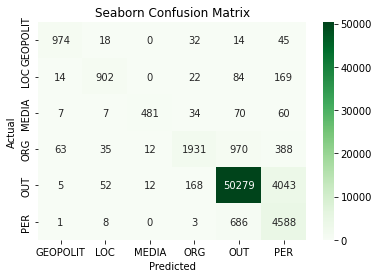

In [ ]:
import seaborn as sns

cm = confusion_matrix(valid_y, preds)
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Greens");

ax.set_title('Seaborn Confusion Matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])
ax.yaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])

plt.show()

In [ ]:
#добавим биграммы и триграммы
def custom_standardization(input_data):
    return input_data

vocab_size = 30000
seq_len = 10

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    ngrams=(1, 3),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)
mmodel1 = modelNER()
mmodel1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
mmodel1.fit( train_data,
            validation_data=valid_data,
            epochs=3)

Epoch 1/3
12409/12409 [==============================] - 64s 5ms/step - loss: 0.2943 - accuracy: 0.9138 - val_loss: 0.2076 - val_accuracy: 0.9389
Epoch 2/3
12409/12409 [==============================] - 65s 5ms/step - loss: 0.1265 - accuracy: 0.9624 - val_loss: 0.2003 - val_accuracy: 0.9421
Epoch 3/3
12409/12409 [==============================] - 59s 5ms/step - loss: 0.1101 - accuracy: 0.9651 - val_loss: 0.2146 - val_accuracy: 0.9416


0.937177866100764
--------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1083
           1       0.87      0.78      0.82      1191
           2       0.95      0.74      0.83       659
           3       0.87      0.57      0.69      3399
           4       0.94      0.99      0.97     54559
           5       0.99      0.71      0.83      5286

    accuracy                           0.94     66177
   macro avg       0.92      0.78      0.84     66177
weighted avg       0.94      0.94      0.94     66177



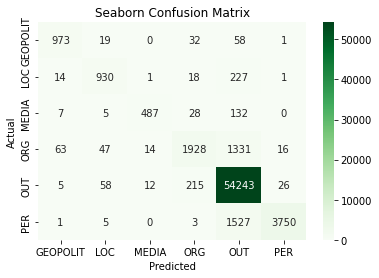

In [ ]:
preds1 = mmodel1.predict(valid_x)
preds1 = np.argmax(preds1,axis=1)
print(f1_score(valid_y, preds1, average= "weighted"))
print('--------------------------------------------')
print(metrics.classification_report(valid_y, preds1))

cm = confusion_matrix(valid_y, preds1)
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Greens");

ax.set_title('Seaborn Confusion Matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])
ax.yaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])

plt.show()



In [ ]:
# увеличим длину последовательности
#добавим биграммы и триграммы
def custom_standardization(input_data):
    return input_data

vocab_size = 30000
seq_len = 100

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    ngrams=(1, 3),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)
mmodel1 = modelNER()
mmodel1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
mmodel1.fit( train_data,
            validation_data=valid_data,
            epochs=3)

Epoch 1/3
12409/12409 [==============================] - 60s 5ms/step - loss: 0.2916 - accuracy: 0.9150 - val_loss: 0.2058 - val_accuracy: 0.9398
Epoch 2/3
12409/12409 [==============================] - 60s 5ms/step - loss: 0.1255 - accuracy: 0.9626 - val_loss: 0.2044 - val_accuracy: 0.9419
Epoch 3/3
12409/12409 [==============================] - 59s 5ms/step - loss: 0.1104 - accuracy: 0.9651 - val_loss: 0.2115 - val_accuracy: 0.9421


0.937761211172429
--------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1083
           1       0.88      0.77      0.82      1191
           2       0.95      0.73      0.83       659
           3       0.87      0.57      0.69      3399
           4       0.94      0.99      0.97     54559
           5       0.99      0.71      0.83      5286

    accuracy                           0.94     66177
   macro avg       0.93      0.78      0.84     66177
weighted avg       0.94      0.94      0.94     66177



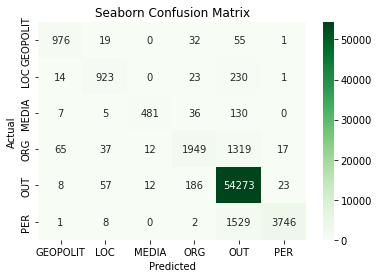

In [ ]:
preds1 = mmodel1.predict(valid_x)
preds1 = np.argmax(preds1,axis=1)
print(f1_score(valid_y, preds1, average= "weighted"))
print('--------------------------------------------')
print(metrics.classification_report(valid_y, preds1))

cm = confusion_matrix(valid_y, preds1)
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Greens");

ax.set_title('Seaborn Confusion Matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])
ax.yaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])

plt.show()
